In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


## Problem Statement:

The task at hand involves classifying images of cats and dogs using a Convolutional Neural Network (CNN). We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.

Objectives:

1. Data Preparation
2. Data Augmentation and Preprocessing:
3. Model Building
4. Training
5. Evaluation
6. Prediction 

## Data Preparation

In [2]:
import zipfile

Zip_files=["test1","train"]
for files in Zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(files),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(files))

test1 unzipped
train unzipped


In [3]:
train_dir="./train"
file_names=os.listdir(train_dir)
print("There are {} number of images in the file".format(len(file_names)))

There are 25000 number of images in the file


In [4]:
def to_df(file_names):
    files,labels=list(),list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df=pd.DataFrame({"File_names":files,"Label":labels})
    return df
df=to_df(file_names)

In [5]:
df.head()

,File_names,Label
0,cat.1740.jpg,cat
1,dog.1797.jpg,dog
2,cat.1929.jpg,cat
3,dog.8655.jpg,dog
4,cat.1364.jpg,cat


In [6]:
cats=[file for file in file_names if file[:3]=="cat"]
Dogs=[file for file in file_names if file[:3]=="dog"]

In [7]:
import matplotlib.image as img
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

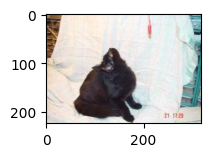

In [8]:
im=img.imread("./train/cat.10961.jpg")
plt.figure(figsize=(2,2))
plt.imshow(im)

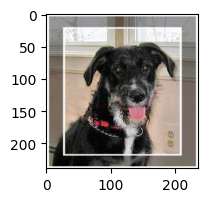

In [9]:
im=img.imread("./train/dog.7383.jpg")
plt.figure(figsize=(2,2))
plt.imshow(im)

## Data Augmentation and Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(df,test_size=0.2,random_state=40)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Width,Height=150,150
batch_size=20

In [12]:
Training_datagenerator=ImageDataGenerator(rescale=1./255,rotation_range=15,width_shift_range=0.1, height_shift_range=0.1,shear_range=0.1,zoom_range=0.2,horizontal_flip=True)

Training_data=Training_datagenerator.flow_from_dataframe(dataframe=x_train,directory=("./train"),x_col="File_names",y_col="Label",target_size=(Width,Height),class_mode="categorical",batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [13]:
Training_data.class_indices

{'cat': 0, 'dog': 1}

In [14]:
Validation_data=ImageDataGenerator(rescale=1./255)

Validation_data=Validation_data.flow_from_dataframe(dataframe=x_test,directory=("./train"),x_col="File_names",y_col="Label",target_size=(Width,Height),class_mode="categorical",batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


## Model Building

In [15]:
from keras.models import Model
from keras.layers import *
from keras.models import Sequential

In [16]:
from keras import Input
from keras import models

In [17]:
input=Input(shape=(150,150,3))
conv=Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")(input)
Batch1=BatchNormalization()
pool1=MaxPooling2D((2,2))(conv)
Drop1=Dropout(0,2)

conv1=Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(pool1)
Batch2=BatchNormalization()
pool2=MaxPooling2D((2,2))(conv1)
Drop2=Dropout(0,2)

conv2=Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(pool2)
Batch3=BatchNormalization()
pool3=MaxPooling2D((2,2))(conv2)
Drop3=Dropout(0,2)

conv3=Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(pool3)
Batch4=BatchNormalization()
pool4=MaxPooling2D((2,2))(conv3)
Drop4=Dropout(0,2)

conv4=Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(pool4)
Batch5=BatchNormalization()
pool5=MaxPooling2D((2,2))(conv4)
Drop5=Dropout(0,2)

flat   = Flatten()(pool5)
dense1 = Dense(512, activation="relu")(flat)
Batch6=BatchNormalization()
Drop6=Dropout(0,2)
output = Dense(2, activation="softmax")(dense1)
model=Model(input,output)

## Training

In [19]:
from keras import optimizers
optimizer=optimizers.SGD(learning_rate=0.02,momentum=0.9)

model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss',mode="min",patience=2)

In [22]:
model.fit(Training_data,epochs=20,batch_size=120,validation_data=Validation_data,callbacks=early_stopping)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 116s 115ms/step - accuracy: 0.5929 - loss: 0.6646 - val_accuracy: 0.6178 - val_loss: 0.6418
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 114s 114ms/step - accuracy: 0.6674 - loss: 0.6129 - val_accuracy: 0.7460 - val_loss: 0.5125
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 117s 116ms/step - accuracy: 0.7229 - loss: 0.5514 - val_accuracy: 0.7804 - val_loss: 0.4581
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 117s 116ms/step - accuracy: 0.7734 - loss: 0.4798 - val_accuracy: 0.7734 - val_loss: 0.4868
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - accuracy: 0.7931 - loss: 0.4326 - val_accuracy: 0.8136 - val_loss: 0.4711
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 114s 113ms/step - accuracy: 0.8210 - loss: 0.3913 - val_accuracy: 0.8316 - val_loss: 0.3828
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - accuracy: 0.8415 - loss: 0.3524 - val_accuracy: 0.8612 - val_loss: 0.3236
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 118s 117ms/step - ac

## Evaluation

In [23]:
score=model.evaluate(Training_data)
print(score)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 107s 107ms/step - accuracy: 0.9089 - loss: 0.2278
[0.223931223154068, 0.9085000157356262]


## Prediction

In [24]:
SampleSubmission=pd.read_csv("/kaggle/input/dogs-vs-cats/sampleSubmission.csv")
Test_file=SampleSubmission.copy()

In [25]:
Test_file["id"]=Test_file["id"].apply(lambda x: str(x) +".jpg")

In [26]:
test_file_datagenerator=ImageDataGenerator(rescale=1./255)

test_file=test_file_datagenerator.flow_from_dataframe(dataframe=Test_file,directory=("./test1"),x_col="id",y_col=None,target_size=(Width,Height),class_mode=None,batch_size=batch_size,shuffle=False)

Found 12500 validated image filenames.


In [27]:
predict = model.predict(test_file)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step


In [28]:
SampleSubmission["label"]=np.argmax(predict,axis=1)
SampleSubmission.to_csv('submission.csv', index=False)

In [30]:
Test_file["label"]=SampleSubmission["label"].replace({1:"Dog",0:"Cat"})

In [31]:
Test_file.tail(5)

,id,label
12495,12496.jpg,Cat
12496,12497.jpg,Cat
12497,12498.jpg,Dog
12498,12499.jpg,Dog
12499,12500.jpg,Cat


In [49]:
Test_file.head(10)

,id,label
0,1.jpg,Dog
1,2.jpg,Dog
2,3.jpg,Dog
3,4.jpg,Dog
4,5.jpg,Cat
5,6.jpg,Cat
6,7.jpg,Cat
7,8.jpg,Cat
8,9.jpg,Cat
9,10.jpg,Cat


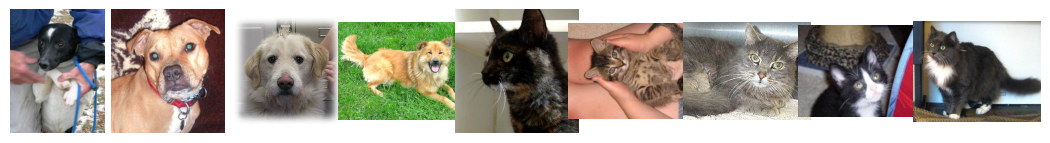

In [50]:
plt.figure(figsize=(15,4.5))
for i in range(1,10):
    im=img.imread("./test1/{}.jpg".format(i))
    plt.subplot(3, 10, i+1)
    plt.imshow(im)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()